# 🌌 Exoplanet Classification Project

## Project Overview

In this project, I used a real-world dataset of confirmed exoplanets to build a classification model that predicts the **type of exoplanet** based on planetary and stellar attributes such as mass, radius, orbital characteristics, and distance from Earth. 

After performing data cleaning and exploratory data analysis (EDA), I began preparing the data for building classification models. The goal of this project is to identify which physical features are most influential in the classification task, offering insights into the diversity of planets beyond our solar system.

## Exploratory Data Analysis (EDA)

* #### Loading and inspecting the data
* #### Cleaning the data
* #### Imputing missing data if needed

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("exoplanet_data.csv") 

# Display first few rows
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


In [3]:
# Understanding data structure

# Shape of dataset
print('Shape', df.shape)

# Data types and non-null values
df.info()

# Basic statistics
df.describe()

Shape (5250, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
count,5233.000000,5089.000000,5250.000000,5227.000000,5233.000000,4961.000000,5.250000e+03,5250.000000
mean,2167.168737,12.683738,2015.732190,6.434812,1.015121,6.962942,4.791509e+02,0.063568
std,3245.522087,3.107571,4.307336,12.972727,0.603479,138.673600,1.680445e+04,0.141424
min,4.000000,0.872000,1992.000000,0.020000,0.200000,0.004400,2.737851e-04,-0.520000
25%,389.000000,10.939000,2014.000000,1.804000,0.325000,0.053000,1.259411e-02,0.000000
50%,1371.000000,13.543000,2016.000000,4.170140,1.120000,0.102800,3.449692e-02,0.000000
75%,2779.000000,15.021000,2018.000000,8.000000,1.410000,0.286000,1.442163e-01,0.060000
max,27727.000000,44.610000,2023.000000,752.000000,6.900000,7506.000000,1.101370e+06,0.950000


In [4]:
# Check for missing values
df.isnull().sum().sort_values(ascending = False)

orbital_radius       289
stellar_magnitude    161
mass_multiplier       23
mass_wrt              23
distance              17
radius_wrt            17
radius_multiplier     17
name                   0
planet_type            0
discovery_year         0
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

In [5]:
# Drop unnecessary columns
df.drop(columns = ['mass_wrt', 'radius_wrt'], inplace = True) # If mass_wrt and radius_wrt are always Jupiter, they don't add value

In [6]:
# Handle categorical features using one-hot-encoding
df = pd.get_dummies(df, columns = ['planet_type', 'detection_method'], drop_first = True)

In [7]:
# Impute missing values

# List of columns to impute
columns_to_impute = ['orbital_radius', 'stellar_magnitude', 'mass_multiplier', 'distance', 'radius_multiplier']

# Create the imputer object
imputer = SimpleImputer(strategy = 'median')

# Fit and transform only the selected columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Check to confirm
df.isnull().sum().sort_values(ascending = False)

name                                              0
distance                                          0
stellar_magnitude                                 0
discovery_year                                    0
mass_multiplier                                   0
radius_multiplier                                 0
orbital_radius                                    0
orbital_period                                    0
eccentricity                                      0
planet_type_Neptune-like                          0
planet_type_Super Earth                           0
planet_type_Terrestrial                           0
planet_type_Unknown                               0
detection_method_Direct Imaging                   0
detection_method_Disk Kinematics                  0
detection_method_Eclipse Timing Variations        0
detection_method_Gravitational Microlensing       0
detection_method_Orbital Brightness Modulation    0
detection_method_Pulsar Timing                    0
detection_me

In [8]:
# Check for duplicates
df.duplicated().sum()
df = df.drop_duplicates()

# Check to confirm
print(df.shape)
pd.set_option('display.max_columns', None)
df.head()

(5250, 23)


,name,distance,stellar_magnitude,discovery_year,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,planet_type_Neptune-like,planet_type_Super Earth,planet_type_Terrestrial,planet_type_Unknown,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
0,11 Comae Berenices b,304.0,4.72307,2007,19.40000,1.08,1.290000,0.892539,0.23,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,11 Ursae Minoris b,409.0,5.01300,2009,14.74000,1.09,1.530000,1.400000,0.08,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,14 Andromedae b,246.0,5.23133,2008,4.80000,1.15,0.830000,0.508693,0.00,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,14 Herculis b,58.0,6.61935,2002,8.13881,1.12,2.773069,4.800000,0.37,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,16 Cygni B b,69.0,6.21500,1996,1.78000,1.20,1.660000,2.200000,0.68,False,False,False,False,False,False,False,False,False,False,False,True,False,False


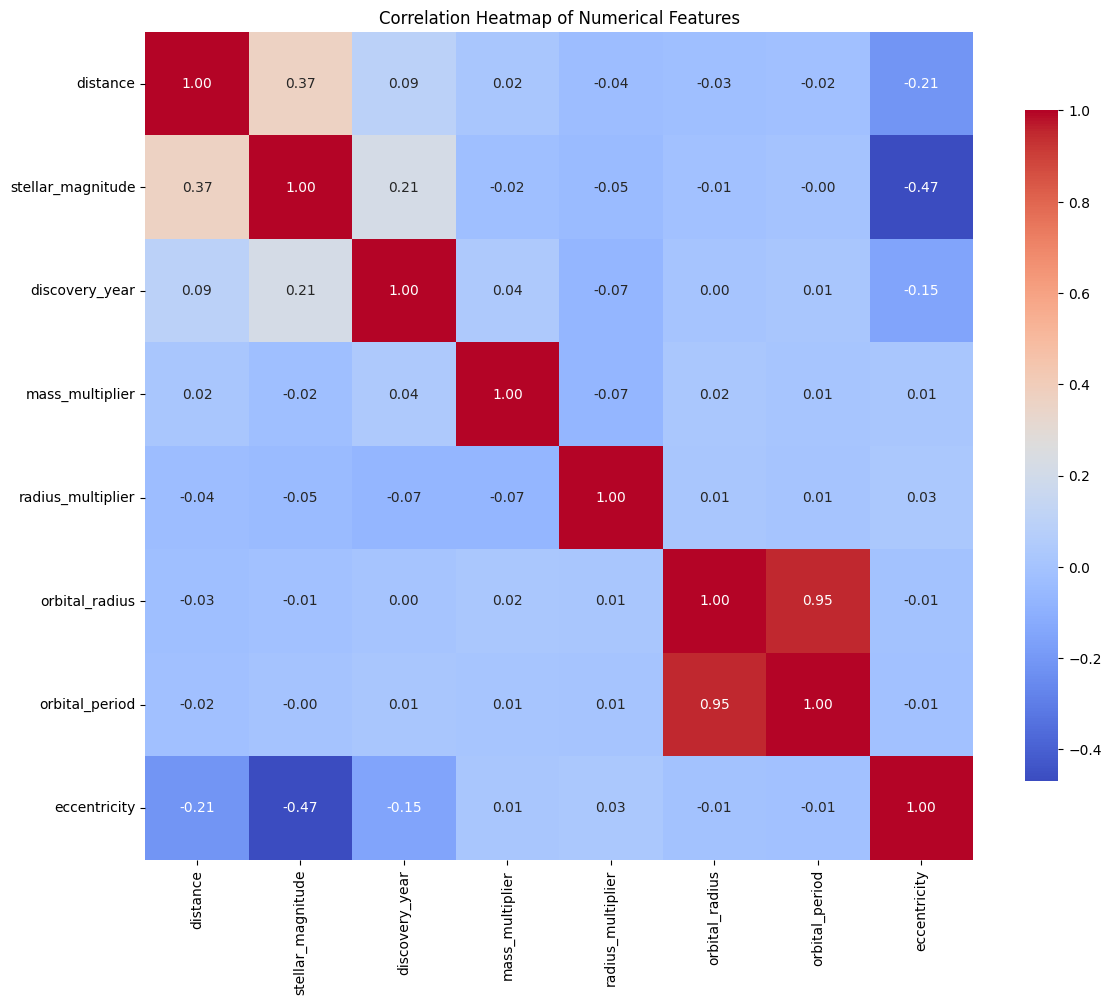

In [9]:
# Visualizations for EDA

# Select numerical features only
numerical_df = df.select_dtypes(include = ['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize = (12, 10)) 
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', square = True, cbar_kws = {'shrink': .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## Interpretation for the heatmap above:

* **Values near 1** → strong positive correlation
* **Values near -1** → strong negative correlation
* **Values near 0** → little to no correlation
* **High correlation between features (e.g., orbital_radius vs. orbital_period)** — this can hint at multicollinearity for modeling